In [120]:
import numpy as np
import matplotlib.pyplot as plt
import os

Do not run the cell below 

In [121]:
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

### Install $\textit{bezier}$
pip install bezier

In [122]:
import bezier

In [123]:
x_points = np.array([0, 0, 0.33, 0.66, 0.9, 1.0])
upper_surface = np.array([0.0, 0.1, 0.3, 0.2, 0.08, 0.0])
lower_surface = np.array([0.0, -0.08, -0.05, 0.09, 0.075, 0.0])

In [124]:
upper_nodes = np.asfortranarray([x_points, upper_surface])
lower_nodes = np.asfortranarray([x_points, lower_surface])
upper_curve = bezier.Curve(upper_nodes, degree=5)
lower_curve = bezier.Curve(lower_nodes, degree=5)

In [125]:
n_vals = 50
s_vals = np.linspace(0, 1, n_vals)
upper_points = upper_curve.evaluate_multi(s_vals)
lower_points = lower_curve.evaluate_multi(s_vals)

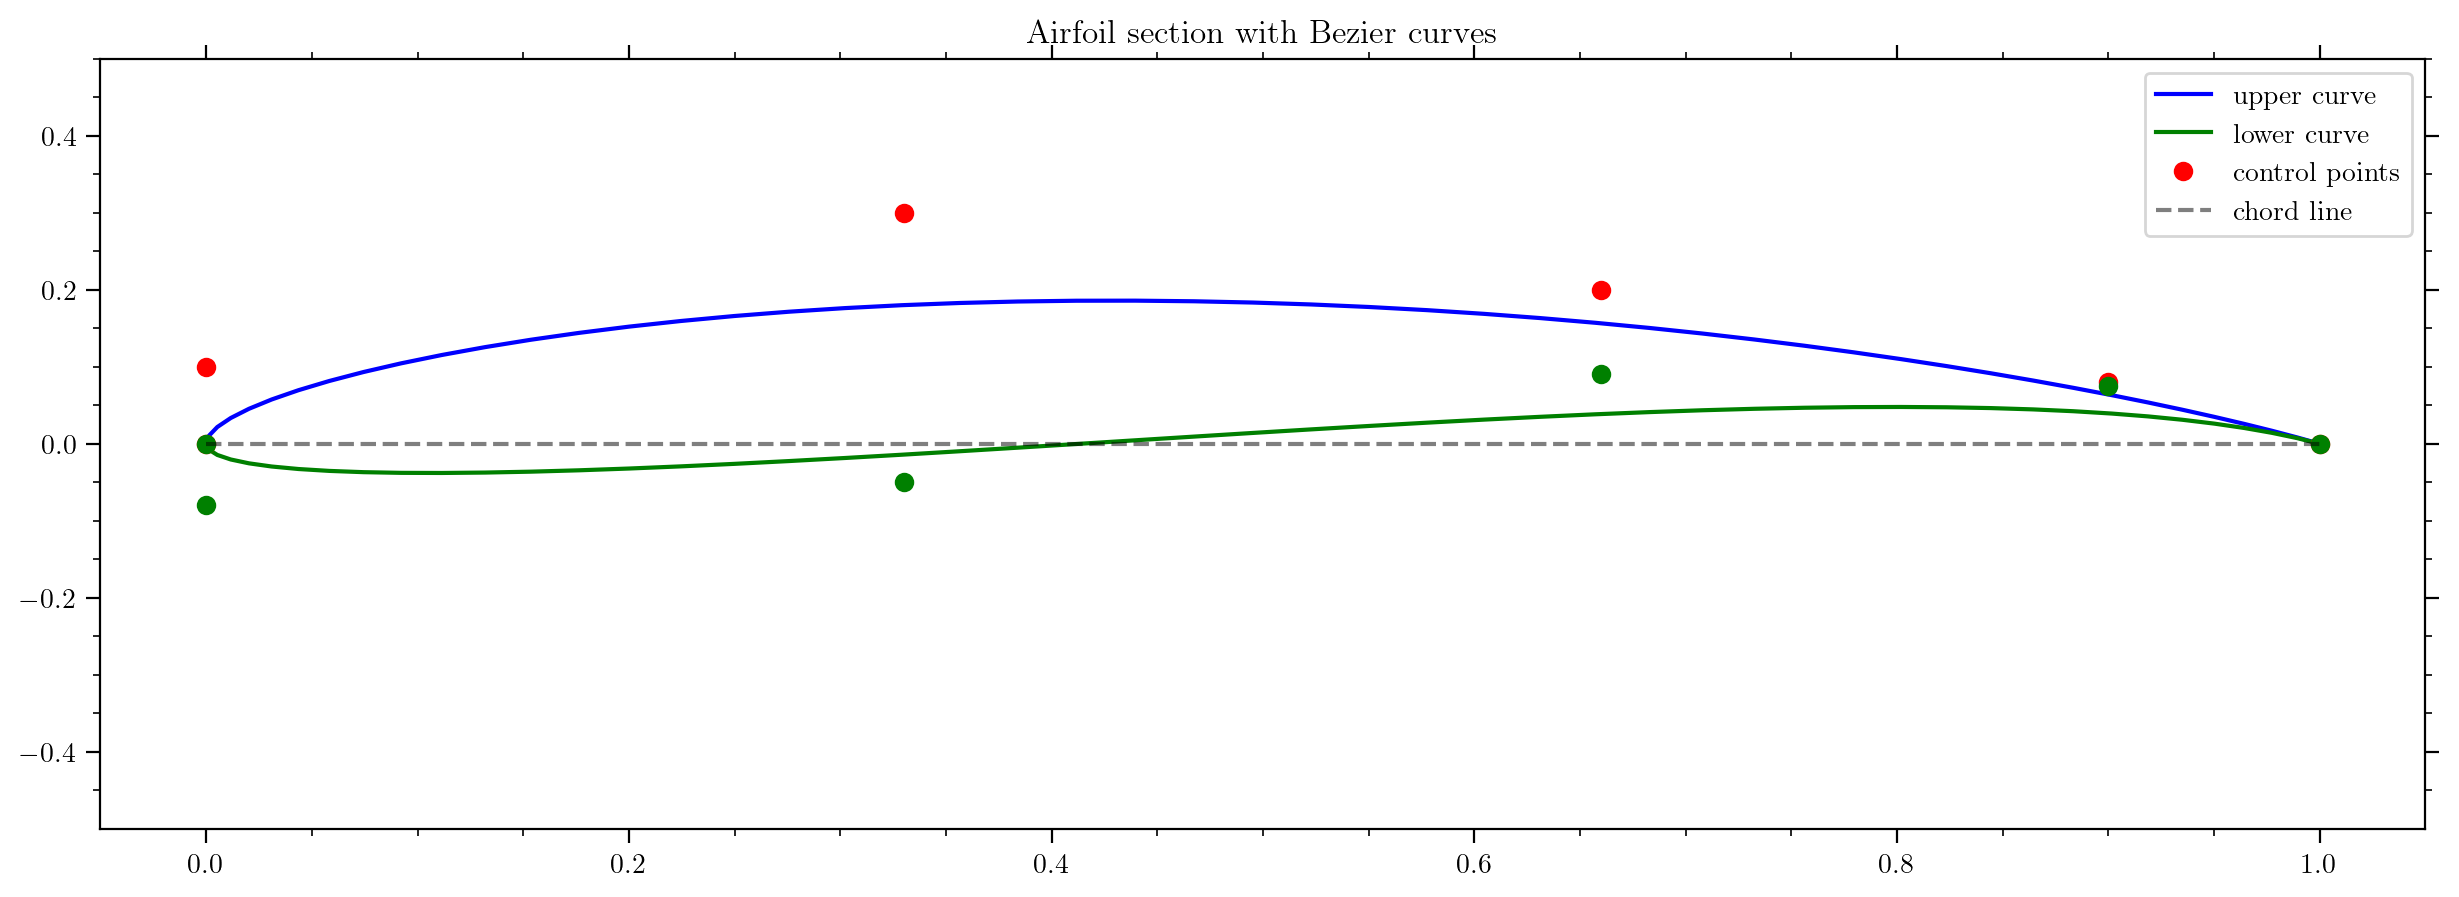

In [126]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(upper_points[0], upper_points[1], label="upper curve", color = 'b')
plt.plot(lower_points[0], lower_points[1], label="lower curve", color='g')
plt.plot(upper_nodes[0], upper_nodes[1], "ro", label="control points")
plt.plot(lower_nodes[0], lower_nodes[1], "go")
plt.plot([0, 1], [0, 0], "k--", label="chord line", alpha=0.5)
plt.title("Airfoil section with Bezier curves")
plt.ylim(-0.5, 0.5)
plt.legend()
plt.show()

In [127]:
airfoil_name = 'NACA XXYY'
file_name = airfoil_name + '.dat'
try:
    f = open(file_name, 'x')
except:
    os.remove(file_name)
    f = open(file_name, 'x')

f.write(airfoil_name + '\n')

10

In [128]:
for i in range(n_vals):
    f.write(str("{0:.4f}".format(upper_points[0][n_vals-i-1])) + '\t' + str("{0:.4f}".format(upper_points[1][n_vals-i-1])) + '\n')
for i in range(1,n_vals):
    f.write(str("{0:.4f}".format(lower_points[0][i])) + '\t' + str("{0:.4f}".format(lower_points[1][i])) + '\n')
f.close()